# Integration of D30 TSC and EXMC, naive and primed cells with human embryo datasets (Messmer, Petropoulos, Zhou and Tyser)

## Correlation coeffient

In [2]:
setwd("/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed")

## Libraries

In [3]:
library(Seurat)
library(dplyr)

Warning message:
“package ‘Seurat’ was built under R version 4.1.2”
Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [4]:
library(tibble)

Warning message:
“package ‘tibble’ was built under R version 4.1.1”


In [5]:
library(patchwork)

In [6]:
library(viridis)

Loading required package: viridisLite



In [7]:
library(ggplot2)

In [8]:
library(RColorBrewer)

In [9]:
library("xlsx")

In [10]:
library("stringr")

In [14]:
library("corrplot")

Warning message:
“package ‘corrplot’ was built under R version 4.1.1”
corrplot 0.92 loaded



## Colour blind palette

In [11]:
#n <- 60
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [12]:
col_vector

[1] "#7FC97F" "#BEAED4" "#FDC086" "#FFFF99" "#386CB0" "#F0027F" "#BF5B17"
 [8] "#666666" "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02"
[15] "#A6761D" "#666666" "#A6CEE3" "#1F78B4" "#B2DF8A" "#33A02C" "#FB9A99"
[22] "#E31A1C" "#FDBF6F" "#FF7F00" "#CAB2D6" "#6A3D9A" "#FFFF99" "#B15928"
[29] "#FBB4AE" "#B3CDE3" "#CCEBC5" "#DECBE4" "#FED9A6" "#FFFFCC" "#E5D8BD"
[36] "#FDDAEC" "#F2F2F2" "#B3E2CD" "#FDCDAC" "#CBD5E8" "#F4CAE4" "#E6F5C9"
[43] "#FFF2AE" "#F1E2CC" "#CCCCCC" "#E41A1C" "#377EB8" "#4DAF4A" "#984EA3"
[50] "#FF7F00" "#FFFF33" "#A65628" "#F781BF" "#999999" "#66C2A5" "#FC8D62"
[57] "#8DA0CB" "#E78AC3" "#A6D854" "#FFD92F" "#E5C494" "#B3B3B3" "#8DD3C7"
[64] "#FFFFB3" "#BEBADA" "#FB8072" "#80B1D3" "#FDB462" "#B3DE69" "#FCCDE5"
[71] "#D9D9D9" "#BC80BD" "#CCEBC5" "#FFED6F"

In [13]:
color_2 = grDevices::colors()[grep('gr(a|e)y', grDevices::colors())]

In [1]:
## Loading rds file
Messmer_Petropoulos_Zhou_Tyser_VPD30_integration<- readRDS(file= "/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed/Messmer_Petropoulos_Zhou_Tyser_VPD30_integration.rds")

In [18]:
Idents(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration)<-Messmer_Petropoulos_Zhou_Tyser_VPD30_integration$finalClusters

In [19]:
av.exp_RNA<- AverageExpression(Messmer_Petropoulos_Zhou_Tyser_VPD30_integration)$RNA

In [20]:
head(av.exp_RNA)
dim(av.exp_RNA)

,TB.medium2,unknown,TB.late,Pre.ST,TB.medium3,PrE,Pre.EVT,Epiblast,ST,EVT,⋯,Hemogenic Endothelial Progenitors,Endoderm,Advanced Mesoderm,Primitive Streak,YS Mesoderm,Axial Mesoderm,Erythrocytes,Emergent Mesoderm,Nascent Mesoderm,Ectoderm
DDX11L1,0.000000e+00,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,⋯,0.0007079384,0.0000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
WASH7P,3.669916e-05,0.0002861059,0.000000e+00,0.000000000,0.000000000,0.0001680416,0.0000000000,5.865309e-03,2.107077e-04,0.0000000000,⋯,0.0270126058,0.0210360300,0.03151634,0.01956646,0.05033347,0.01237373,0.01068497,0.01894707,0.01339084,0.02958163
MIR6859-1,5.787875e-05,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,0.000000e+00,0.000000e+00,0.0000000000,⋯,0.0000000000,0.0000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
MIR1302-2HG,0.000000e+00,0.0000000000,0.000000e+00,0.000000000,0.000000000,0.0000000000,0.0000000000,8.081978e-04,2.209328e-05,0.0000000000,⋯,0.0000000000,0.0004709682,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
OR4G4P,1.100831e-04,0.0291253165,1.002411e-05,0.009926379,0.003740901,0.0003069684,0.0001490161,8.575554e-06,9.498281e-04,0.0002217845,⋯,0.0000000000,0.0000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
OR4G11P,1.461739e-03,0.0560729175,1.691110e-03,0.008759021,0.012452331,0.0005147141,0.0009493742,0.000000e+00,3.629425e-03,0.0013658507,⋯,0.0002142707,0.0000000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000


[1] 79927    36

In [21]:
features<- Messmer_Petropoulos_Zhou_Tyser_VPD30_integration@assays$integrated@var.features

In [22]:
av.exp_RNA_features<- av.exp_RNA[which(row.names(av.exp_RNA)%in% features),]

In [23]:
head(av.exp_RNA_features)
dim(av.exp_RNA_features)

,TB.medium2,unknown,TB.late,Pre.ST,TB.medium3,PrE,Pre.EVT,Epiblast,ST,EVT,⋯,Hemogenic Endothelial Progenitors,Endoderm,Advanced Mesoderm,Primitive Streak,YS Mesoderm,Axial Mesoderm,Erythrocytes,Emergent Mesoderm,Nascent Mesoderm,Ectoderm
ISG15,0.314135364,0.424321094,0.5821444313,0.333745415,0.28709387,0.478143192,0.8389685031,0.252336830,0.580283711,3.784349186,⋯,3.0838057281,0.321593295,0.397399709,0.3168233285,0.834494944,0.113892167,0.1110353,0.0964670853,0.124726745,0.02368156
SCNN1D,0.001250793,0.006972322,0.0001208429,0.004488774,0.02437453,0.004307135,0.0007033250,0.003970365,0.001890486,0.000000000,⋯,0.0000000000,0.001092696,0.000000000,0.0003062736,0.000000000,0.000000000,0.0000000,0.0008230072,0.000000000,0.00000000
MXRA8,0.649832756,0.423581806,0.8411260596,0.535896621,0.65058626,0.216294445,1.0019477662,0.172065347,0.475961133,2.024144166,⋯,0.0467358825,0.318511325,0.611680463,0.1189818762,0.992431378,0.987336198,0.3859178,0.6297311161,0.099876740,1.90828622
ATAD3B,1.763754075,1.244486798,1.4809450261,1.150943549,1.45790104,1.587234056,0.9846932604,2.048532304,0.619497079,0.546409464,⋯,0.0897438102,0.047644916,0.038012244,0.0268314461,0.064624218,0.001015216,0.2136496,0.0285042579,0.045780455,0.00110430
FNDC10,0.057546409,0.041714456,0.0217175606,0.007508330,0.03353850,0.134593962,0.0289590612,0.223393945,0.011034439,0.016231384,⋯,0.0121815982,0.020641272,0.008043253,0.0241292351,0.009033263,0.022625568,0.0000000,0.0296175346,0.004599133,0.00000000
PRDM16,0.001678199,0.018250656,0.0034528841,0.018212860,0.00405550,0.005647549,0.0003977595,0.002537947,0.001978715,0.007885237,⋯,0.0001766881,0.000000000,0.005280386,0.0000000000,0.003239404,0.000000000,0.0000000,0.0006285361,0.000000000,0.00000000


[1] 2000   36

In [24]:
av.exp_RNA_features_reordered <- av.exp_RNA_features[, c("EightCells", "Morula", "B1_B2","Epiblast", "naive", "Pham, Panda Naive", "PrE",  "primed","Pham, Panda primed",  "Primitive Streak","early_TE", "medium_TE",  "late_TE","ysTE", "Pham, Panda TSC", "TB.early", "TB.medium1","TB.medium2","TB.medium3", "TB.late", "TB.apoptosis","Pre.ST", "ST",  "Pre.EVT","EVT", "Advanced Mesoderm",  "Axial Mesoderm","Nascent Mesoderm", "Emergent Mesoderm",  "Hemogenic Endothelial Progenitors","YS Mesoderm", "Pham, Panda EXMC", "Erythrocytes", "Ectoderm","Endoderm", "unknown")]



In [25]:
cor_av.exp_RNA_features <- cor(av.exp_RNA_features_reordered, method= "spearman")

In [26]:
dim(cor_av.exp_RNA_features )

[1] 36 36

In [27]:
cor_av.exp_RNA_features <- cor_av.exp_RNA_features[-36,-36]

In [28]:
write.csv(cor_av.exp_RNA_features, "/lustre1/project/stg_00041/XuanAi/EXMC_2021_2022/Archive/D30TSC_EXMC_naive_primed/cor_av.exp_RNA_2000features_humanEmbryo_D30EXMC.csv")

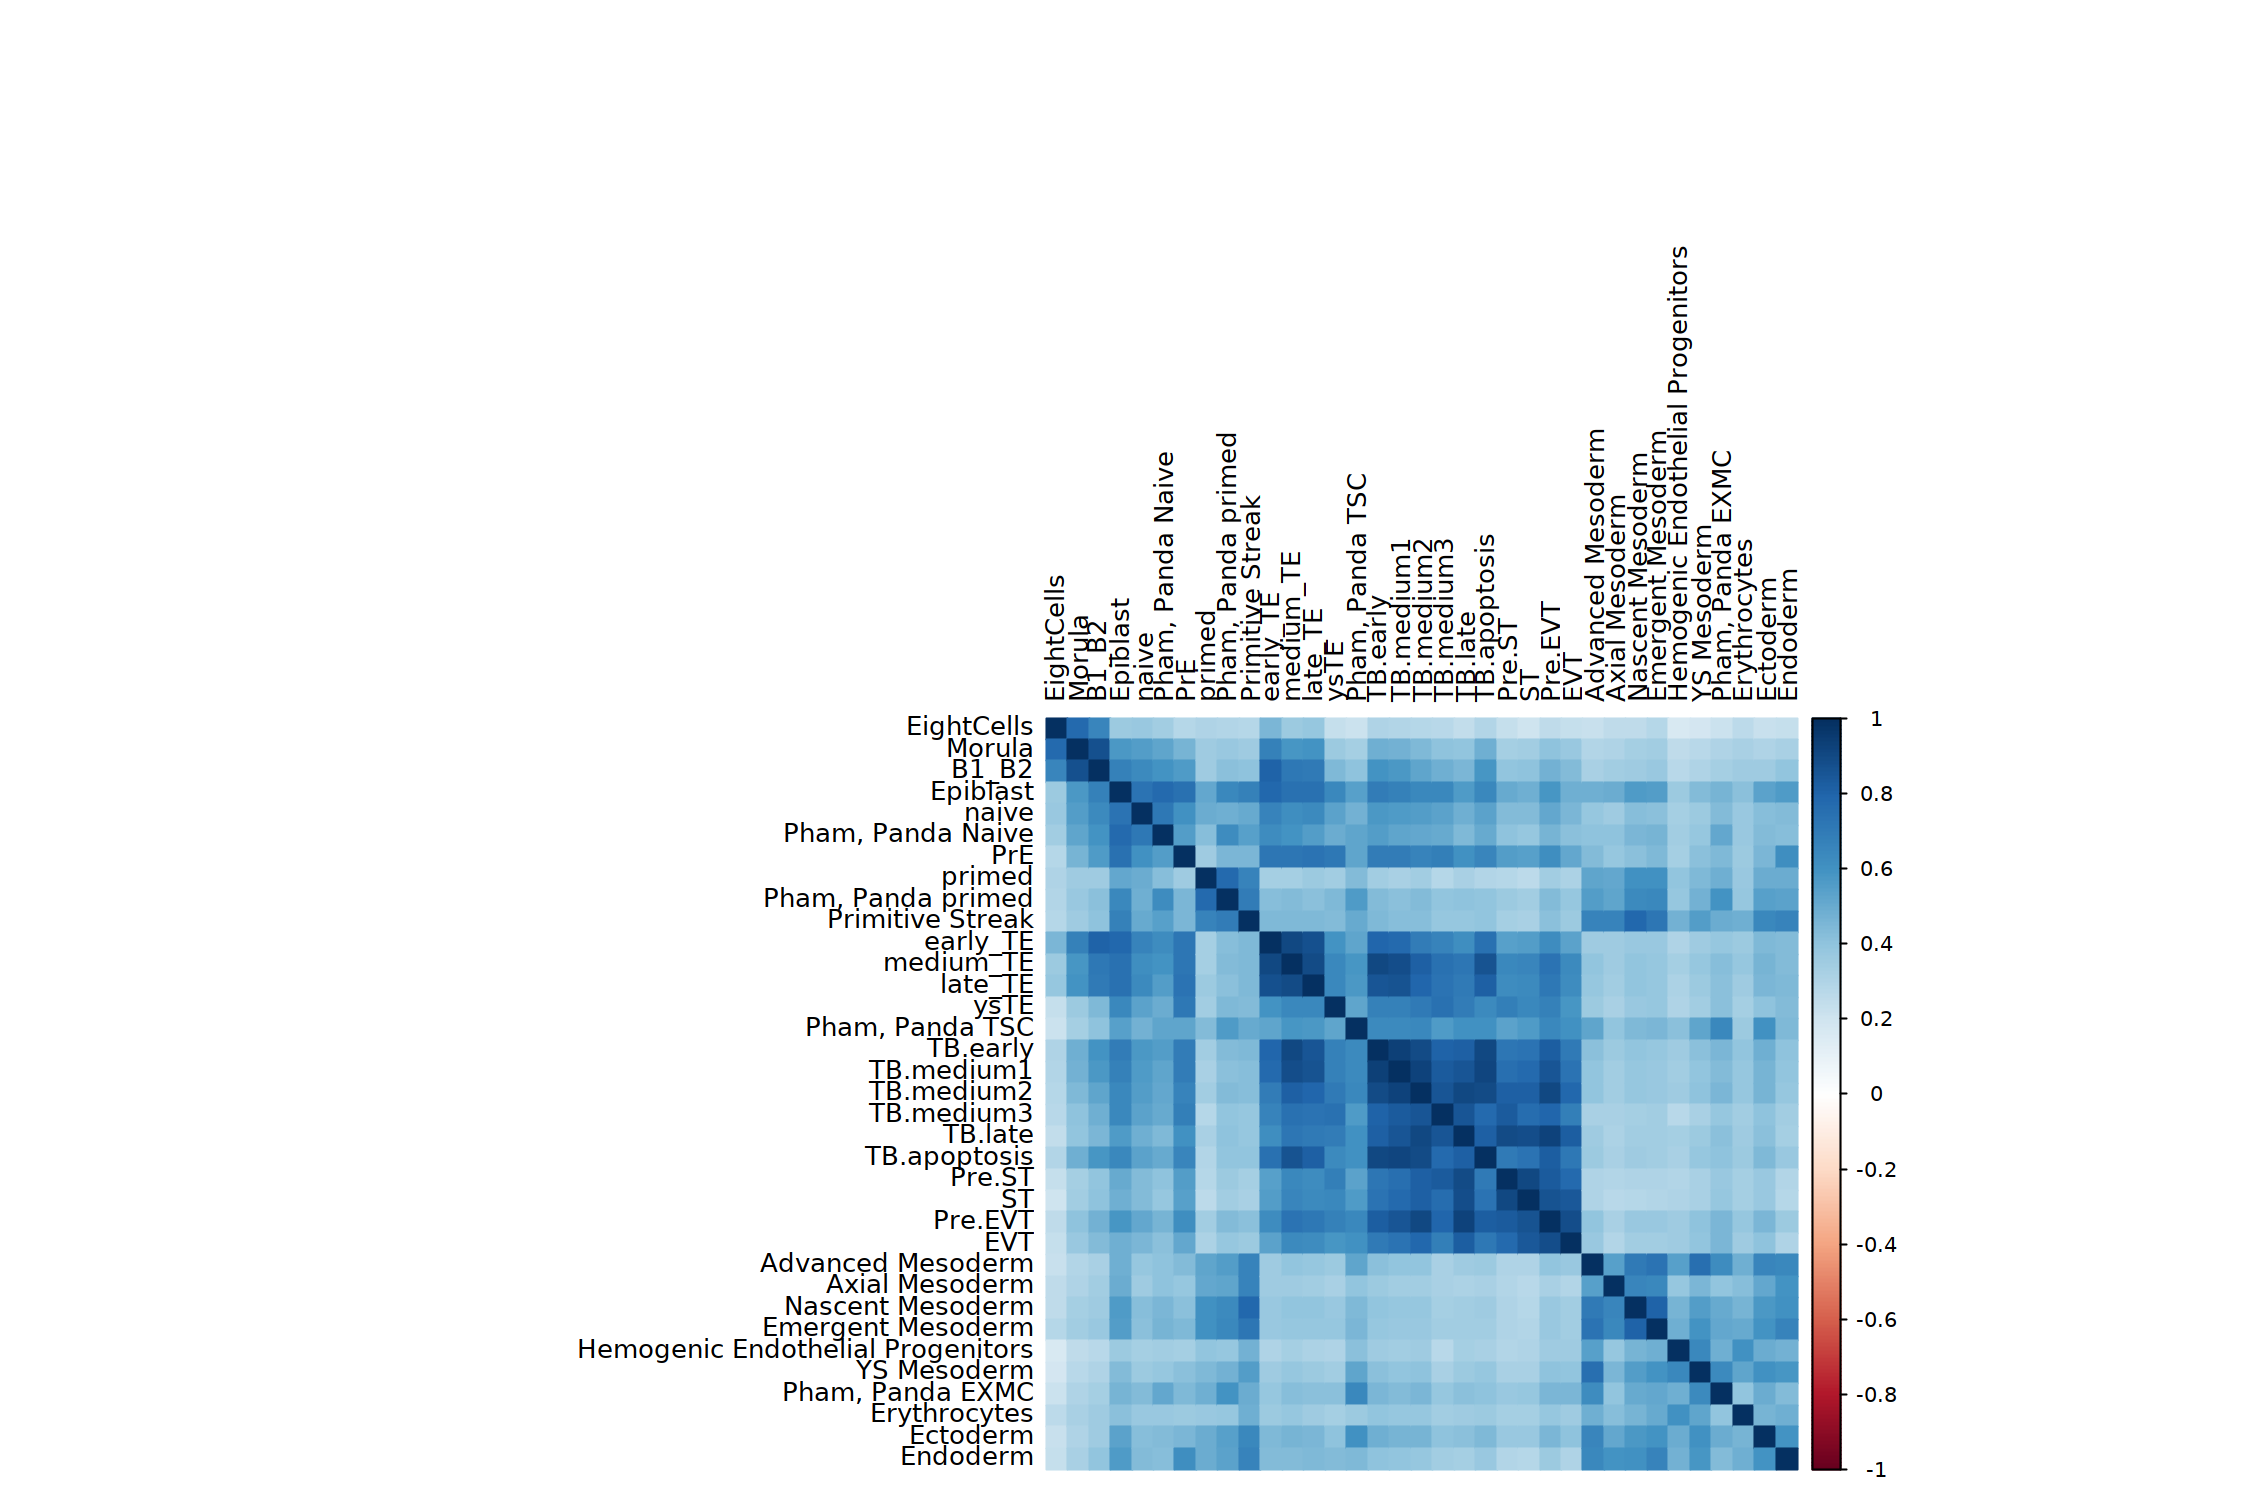

In [29]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
corrplot(cor_av.exp_RNA_features , method = "color", tl.col="black")

In [30]:
pdf("Figures/Correlation_coeffient_MVZT_VPD30_color_RNA.pdf", width = 20, height = 20)
corrplot(cor_av.exp_RNA_features , method = "color", tl.col="black")
dev.off()

png 
  2

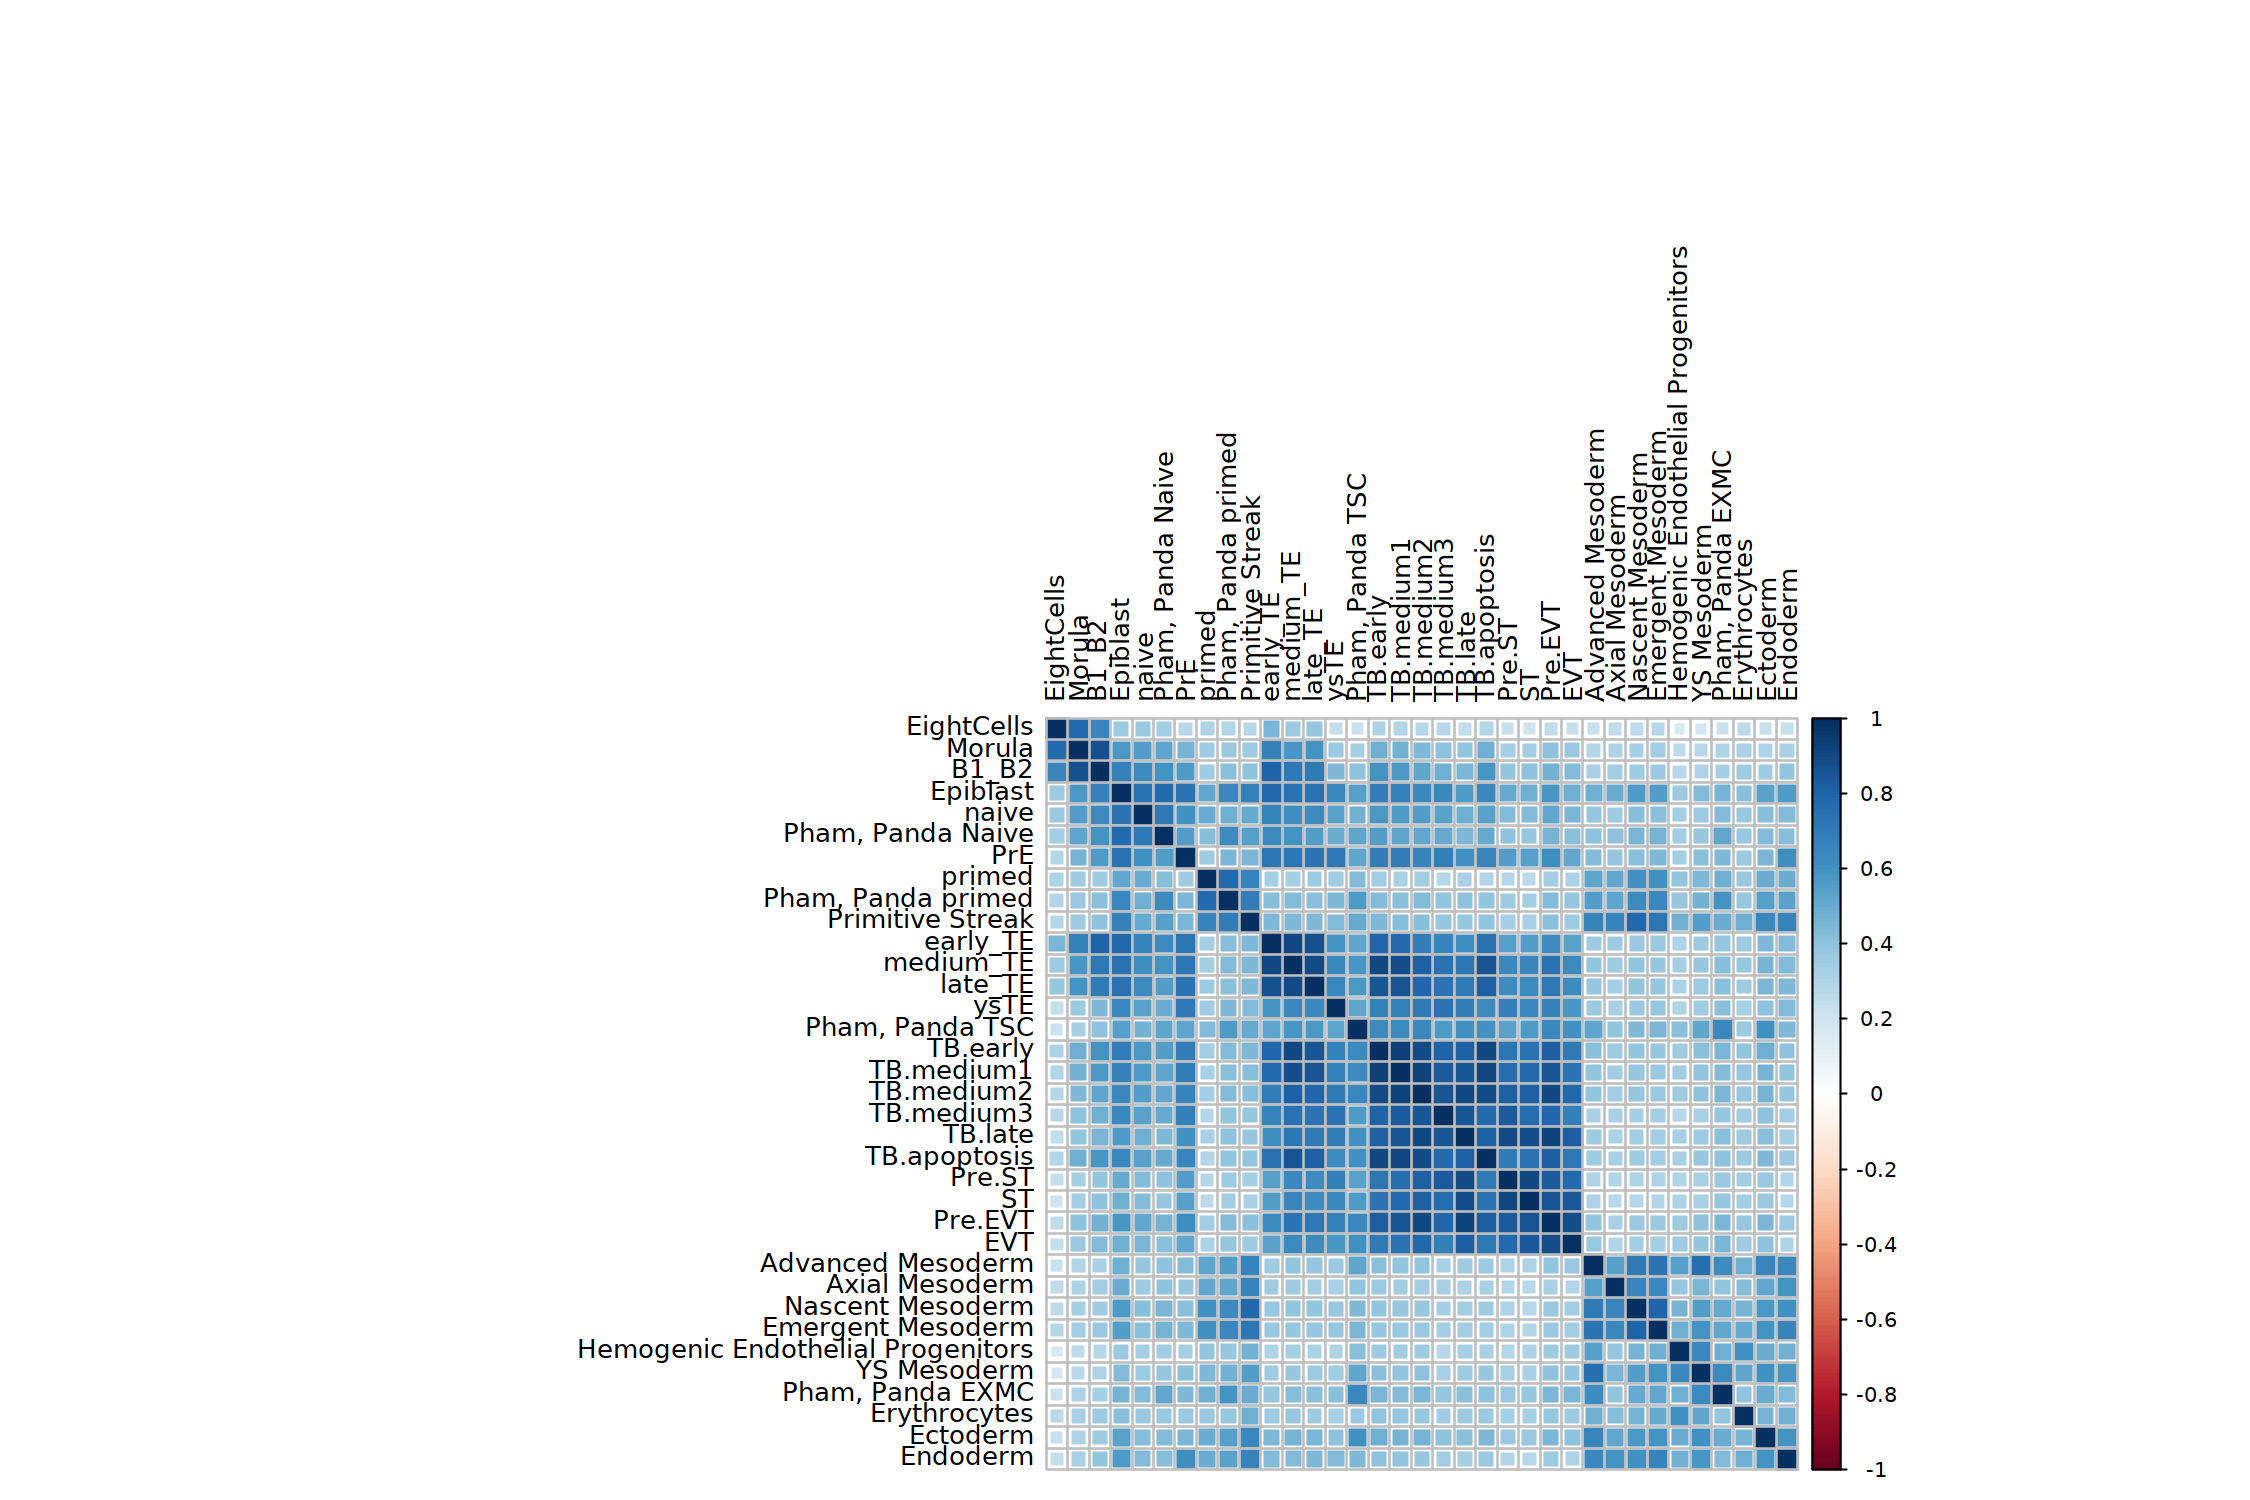

In [31]:
options(repr.plot.width = 15, repr.plot.height = 10, repr.plot.res = 150)
corrplot(cor_av.exp_RNA_features , method = "square", tl.col="black")

In [32]:
pdf("Figures/Correlation_coeffient_MVZT_VPD30_square_RNA.pdf", width = 20, height = 20)
corrplot(cor_av.exp_RNA_features , method = "square", tl.col="black")
dev.off()

png 
  2

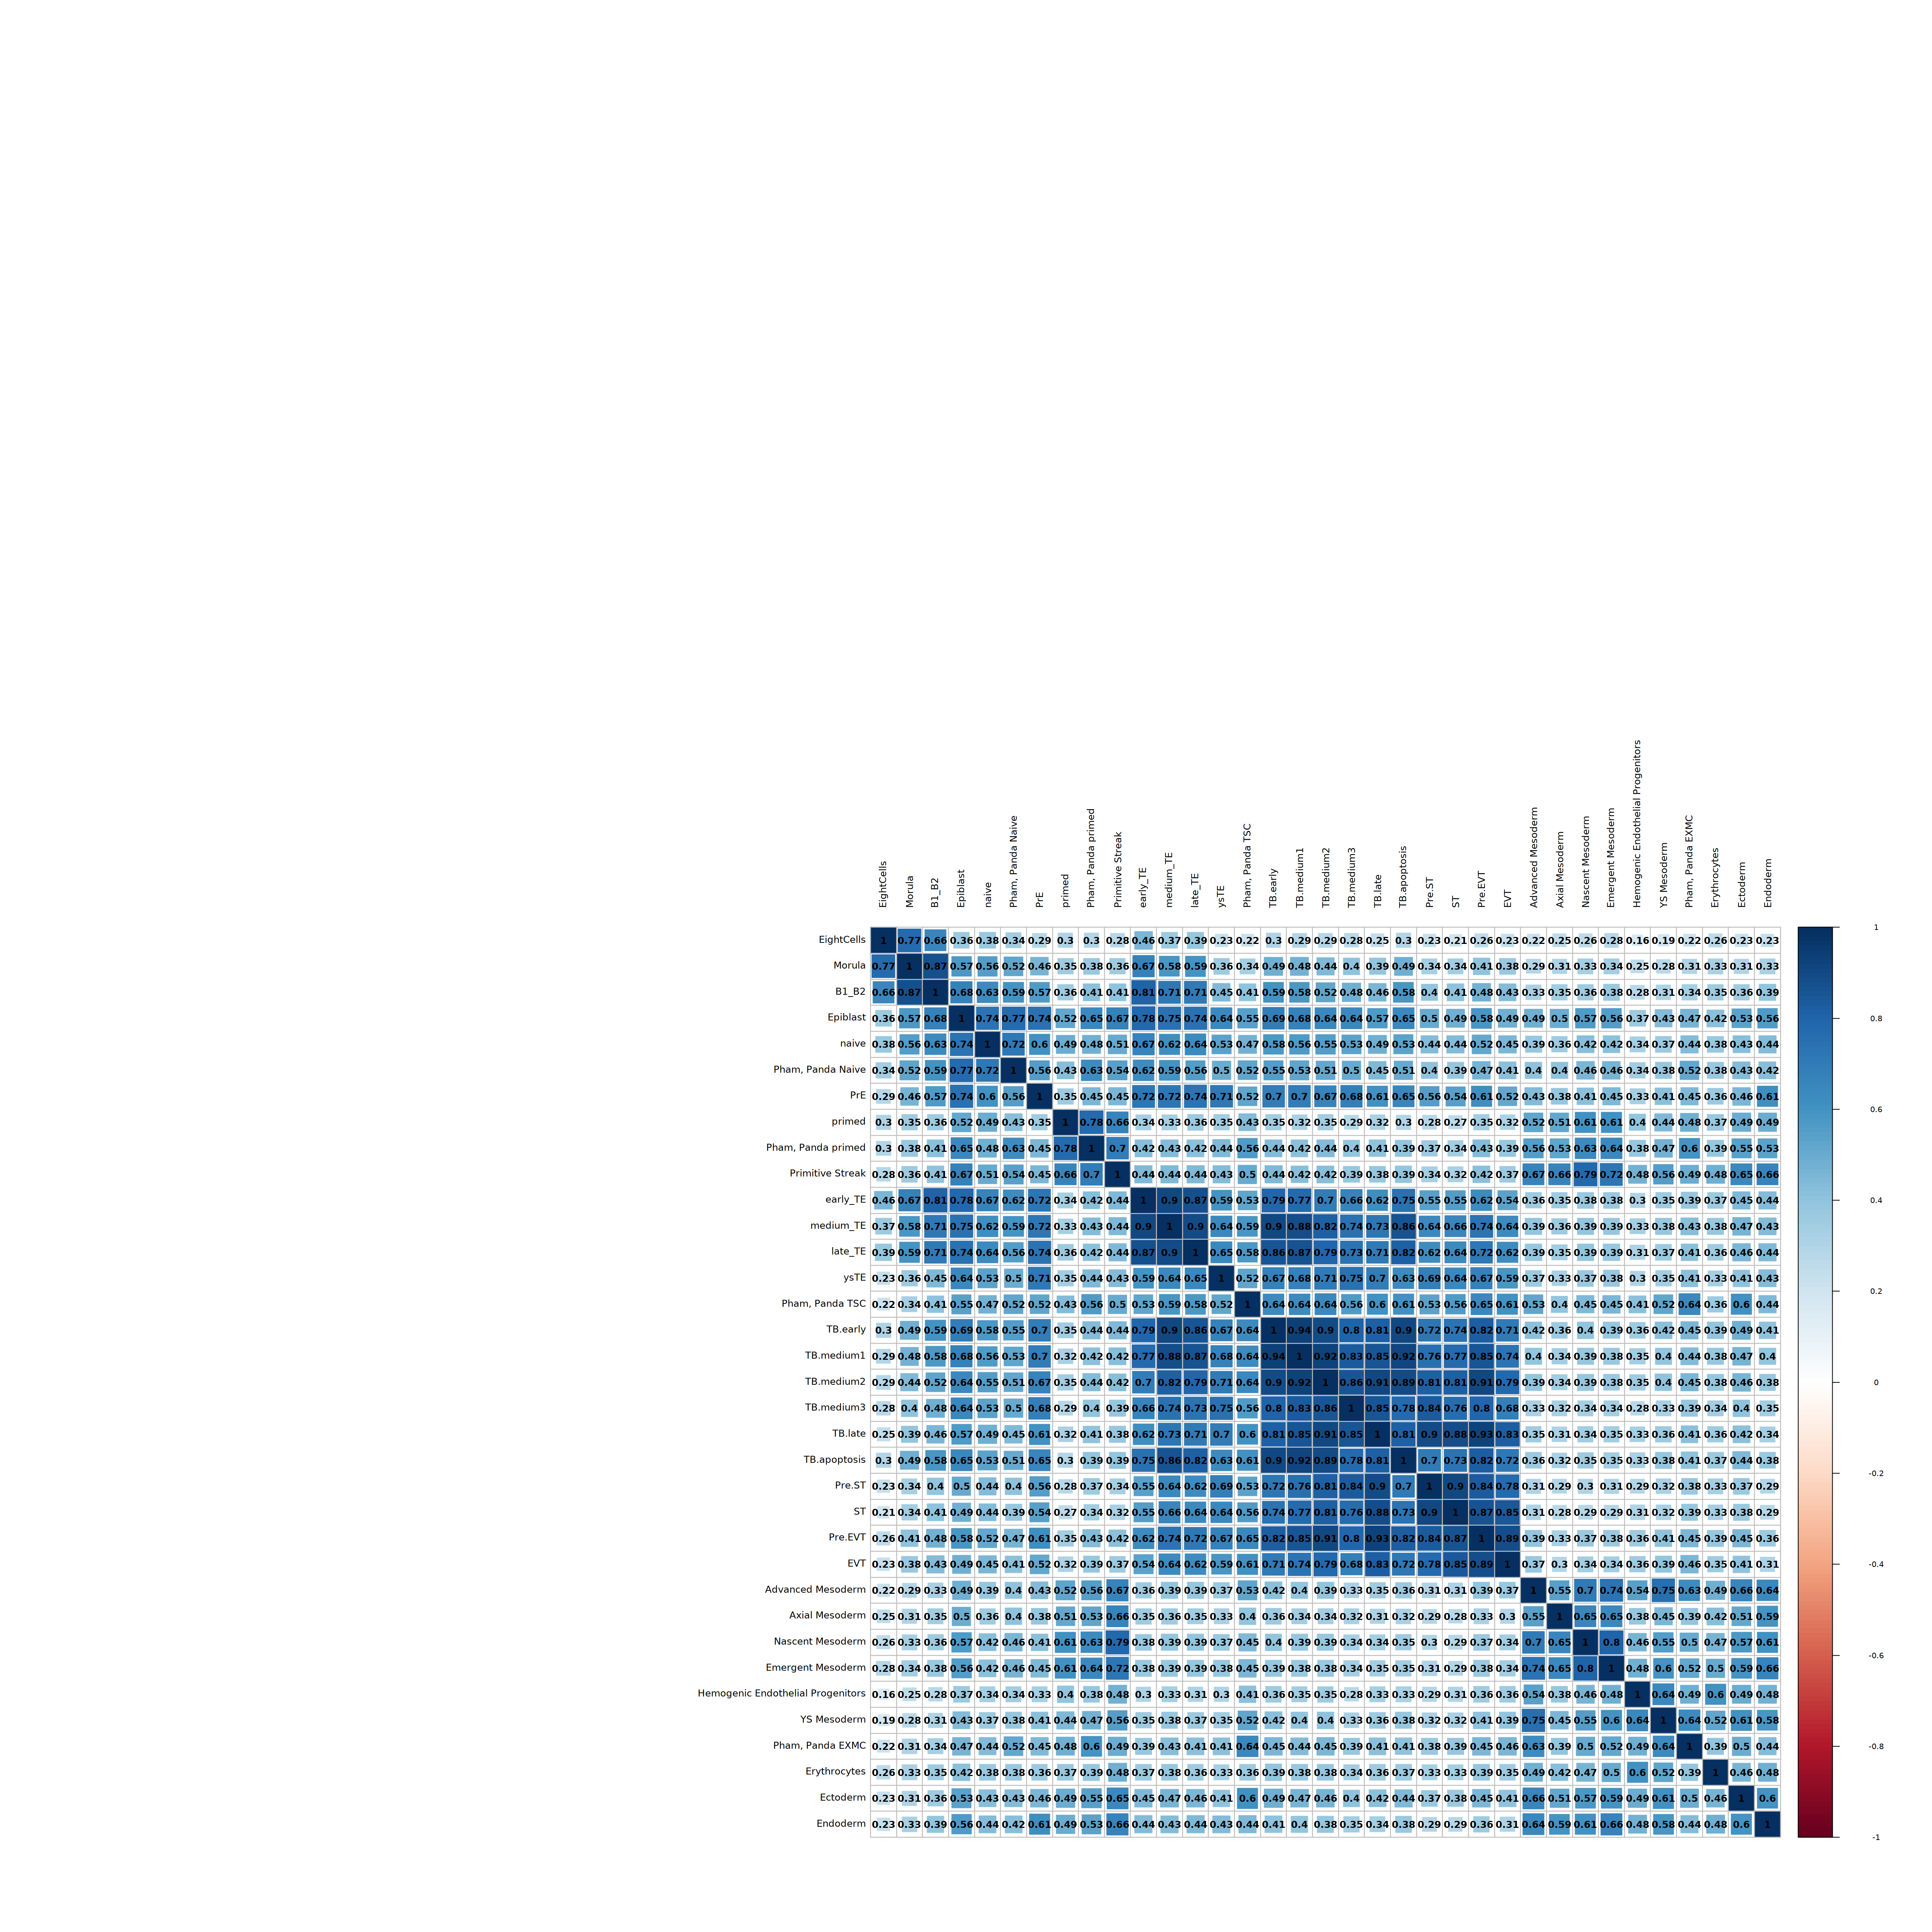

In [33]:
options(repr.plot.width = 35, repr.plot.height = 35, repr.plot.res = 150)
corrplot(cor_av.exp_RNA_features, method="square",  
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black"
         )

In [34]:
pdf("Figures/FigS1D_Correlation_coeffient_MVZT_VPD30_square_number_RNA.pdf", width = 20, height = 20)
corrplot(cor_av.exp_RNA_features, method="square",  
         addCoef.col = "black", # Add coefficient of correlation
         tl.col="black" )
dev.off()

png 
  2